In [1]:
from HeaderP import *
import Astraea

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [96]:
apoge=pd.read_pickle('../Data/Apogee_kepler_cm.pkl')
df=pd.read_pickle('../Data/APOGEE_Prot.pkl')
ages=readfits('../../SecondYear/apogee_astroNN-DR16-v1.fits')
ages

,APOGEE_ID,LOCATION_ID,TELESCOPE,RA_APOGEE,DEC_APOGEE,TEFF,TEFF_ERR,LOGG,LOGG_ERR,C_H,...,theta_phi,theta_phi_err,theta_z,theta_z_err,rl,rl_err,Energy,Energy_err,EminusEc,EminusEc_err
0,VESTA,1.0,apo1m,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2M00000002+7417074,5046.0,apo25m,0.000103,74.285408,3855.157227,49.542202,0.817739,0.188952,-0.065494,...,0.156882,0.004799,1.183869,0.053029,9.179817,0.149323,-36125.514493,786.841120,-53290.855192,349.118918
2,2M00000019-1924498,5071.0,apo25m,0.000832,-19.413851,5301.893066,87.216347,3.676076,0.287316,-0.231211,...,6.190612,0.020696,3.685223,0.032491,7.813145,0.170422,-43189.669301,801.581542,-55838.684879,192.400322
3,2M00000032+5737103,4424.0,apo25m,0.001335,57.619530,5731.417480,165.994400,2.851072,0.182911,-0.390399,...,0.106585,0.000682,4.110654,0.059737,8.953243,0.014118,-37972.494019,67.847124,-54460.159874,24.653441
4,2M00000032+5737103,4264.0,apo25m,0.001335,57.619530,5725.205566,159.599442,2.815395,0.218909,-0.476196,...,0.107246,0.000682,4.114248,0.060055,8.944326,0.014136,-38018.792895,67.938074,-54479.115463,24.631619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473302,2M23595756+8535275,5067.0,apo25m,359.989841,85.590996,5058.915039,74.910744,3.811991,0.332647,0.329254,...,0.074330,0.000192,2.201710,0.003951,9.067347,0.001673,-37046.466524,9.365413,-53880.826626,4.355623
473303,2M23595837+5700444,4264.0,apo25m,359.993224,57.012356,4892.823730,32.387299,2.413542,0.033932,-0.397376,...,0.483988,0.005541,5.501196,0.045717,12.510647,0.225068,-23508.481557,797.829500,-48605.532648,365.969703
473304,2M23595886-2009435,5071.0,apo25m,359.995258,-20.162107,5457.661133,115.059898,4.028604,0.508939,0.239907,...,6.182002,0.004209,4.910762,0.014647,8.225137,0.023995,-40535.943450,81.407036,-54660.428261,14.298320
473305,2M23595886+5726058,4424.0,apo25m,359.995265,57.434956,4852.323730,23.762592,2.430786,0.027727,-0.255256,...,0.246891,0.001724,3.616162,0.019596,8.667439,0.042496,-38955.897258,209.752796,-54547.797585,74.409333


In [97]:
df=df[[i for i in df.columns if 'age' not in i]]
df['Prot']=df['Prot_cannon']

In [98]:
df['APOGEE_ID']=df['ID']
df=pd.concat([df,apoge]).reset_index(drop=True)
df=df.drop_duplicates(subset='APOGEE_ID')


In [99]:
df=pd.merge(df,ages[['APOGEE_ID','age','age_total_error']],left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')
df

,APOGEE_ID_x,ID,M_H_cannon,TEFF_cannon,LOGG_cannon,Prot_cannon,VSINI_cannon,M_H_err_cannon,TEFF_err_cannon,LOGG_err_cannon,...,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist,age,age_total_error
0,2M00005343+0040594,2M00005343+0040594,-0.195354,5980.943035,4.244199,7.982656,26.636515,0.087026,0.033166,0.072265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.218682,2.065147
1,2M00021917+0142107,2M00021917+0142107,-0.048676,5081.981908,4.433250,4.636062,11.645977,0.024550,0.015000,0.051205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.675029,1.861890
2,2M00024876-0018006,2M00024876-0018006,-0.046485,4942.253210,4.734999,24.868061,15.604627,0.021626,0.014260,0.040498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.829245,2.102043
3,2M00033917+0204106,2M00033917+0204106,-0.187895,6013.608219,4.295739,10.264881,49.601825,0.055760,0.022590,0.048894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.816360,2.213106
4,2M00043378-0007544,2M00043378-0007544,0.091975,6170.185282,4.771693,31.328234,12.778802,0.049493,0.019103,0.042369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.895980,2.114004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,11.283,10.659,10.581,none,0.092620,11.121162,2.950535
5800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,11.041,10.857,10.797,none,0.073056,2.828768,1.519001
5801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,10.392,10.036,9.980,none,0.121739,5.856393,1.590663
5802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,10.490,10.219,10.167,none,0.189281,3.202543,1.675696


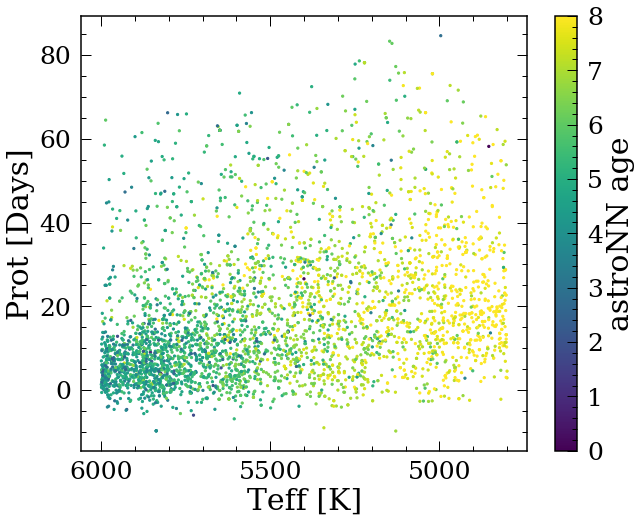

In [100]:
plt.figure(figsize=(10,8))
plt.scatter(df['TEFF'],df['Prot_cannon'],s=5,c=df['age'],vmin=0,vmax=8)
plt.xlabel('Teff [K]')
plt.ylabel('Prot [Days]')
#plt.xlim([3000,7000])
#plt.ylim([0,50])
plt.gca().invert_xaxis()
cb=plt.colorbar()
cb.set_label('astroNN age')


In [101]:
solarstars=df.loc[abs(df['M_H']+0.05)<0.05]
solarstars=solarstars.reset_index(drop=True)
print(np.shape(solarstars))

(1399, 364)


In [127]:
def plotdiag(element,protselect):
    plt.figure(figsize=(10,8))
    cm = plt.cm.get_cmap('viridis',10)

    plt.scatter(solarstars['age'],solarstars[element+'_FE'],s=5,c=solarstars['Prot_cannon'],
                cmap=cm,vmin=0,vmax=30)
    cb=plt.colorbar()
    cb.set_label('Predicted periods [days]')
    plt.xlabel('Age [Gyr]')
    plt.ylabel('['+element+'/Fe]')
    plt.xlim([2,10])
    plt.ylim([-0.2,0.3])
    
    print(min(solarstars['Prot_cannon']),max((solarstars['Prot_cannon'])))
    
    cm = plt.cm.get_cmap('viridis',10)
    
    # all seperated by periods
    plt.figure(figsize=(10*(len(protselect)),10))
    for i in range(1,len(protselect)):
        plt.figure(figsize=(10,8))
        m1=(solarstars['Prot_cannon']>protselect[i-1]) & (solarstars['Prot_cannon']<protselect[i])
        m2=(solarstars['age']<10)
        m=m1&m2

        plt.scatter(solarstars['age'][m],solarstars[element+'_FE'][m],
                s=10,c=solarstars['Prot_cannon'][m],cmap=cm,vmin=0,vmax=30)
        cb=plt.colorbar()
        cb.set_label('Predicted periods [days]')
        plt.xlabel('Age [Gyr]')
        plt.ylabel('['+element+'/Fe]')
        plt.xlim([2,10])
        plt.ylim([-0.2,0.3])
        plt.title('%d < Prot < %d'%(protselect[i-1],protselect[i]),fontsize=25)
    plt.tight_layout()
    return 1
        

In [119]:
def calc_disp(df,name):
    df_dropna=df.dropna(subset=['age',name,name+'_ERR'])
    
    p=fitpoints(df_dropna['age'].values,df_dropna[name].values)
    
    totdisp=np.mean((df_dropna[name]-p(df_dropna['age']))**2.)
    meadisp=calc_measure_disp(df,name,p)
    intdisp=np.sqrt(totdisp-meadisp)
    return np.sqrt(totdisp),intdisp


def calc_measure_disp(df,name,p):
    trytime=50
    agedisp=[]
    
    x,xerr=df['age'].values,df['age_total_error'].values
    y,yerr=df[name].values,df[name+'_ERR'].values
    
    for i in trange(trytime):
        df['newage']=np.array([np.random.normal(x[k], xerr[k],1)[0] for k in range(len(x))])
        df['newabun']=np.array([np.random.normal(y[k], yerr[k],1)[0] for k in range(len(y))])
        df['newmed']=p(df['newage'])
            
        agedisp.append(np.mean((df['newabun']-df['newmed'])**2.))
            
            
    return np.std(np.array(agedisp))**2.



In [120]:
import random

def calcdisp_prot(element,protselect):

    disps=np.zeros(len(protselect)-1)
    totdisp=np.zeros(len(protselect)-1)
    nostar=np.zeros(len(protselect)-1)
    meanprot=np.zeros(len(protselect)-1)


    for i in trange(len(protselect)-1):
        m=(solarstars['Prot_cannon']>protselect[i]) & (solarstars['Prot_cannon']<protselect[i+1])
        nostar[i]=(sum(m))
    
    starpick=min(nostar)

    for i in trange(len(protselect)-1):
        m=(solarstars['Prot_cannon']>protselect[i]) & (solarstars['Prot_cannon']<protselect[i+1])
        df=solarstars[m].reset_index(drop=True)
    
        ind=range(len(df))
        picked=random.sample(ind, int(starpick))
        df=df.iloc[picked].reset_index(drop=True)
    
        totdisp[i],disps[i]=calc_disp(df,element+'_FE')
        nostar[i]=(len(df))
        meanprot[i]=(protselect[i]+protselect[i+1])/2
    return meanprot,disps,starpick
    

-5.598875689001925 75.79260695872117


1

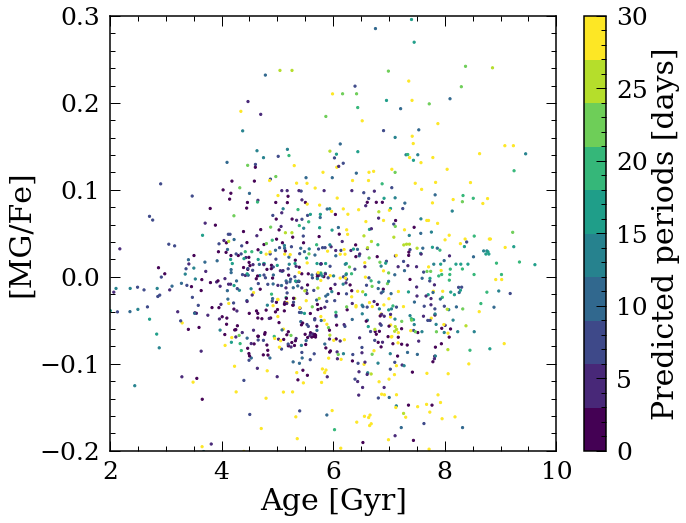

<Figure size 5040x720 with 0 Axes>

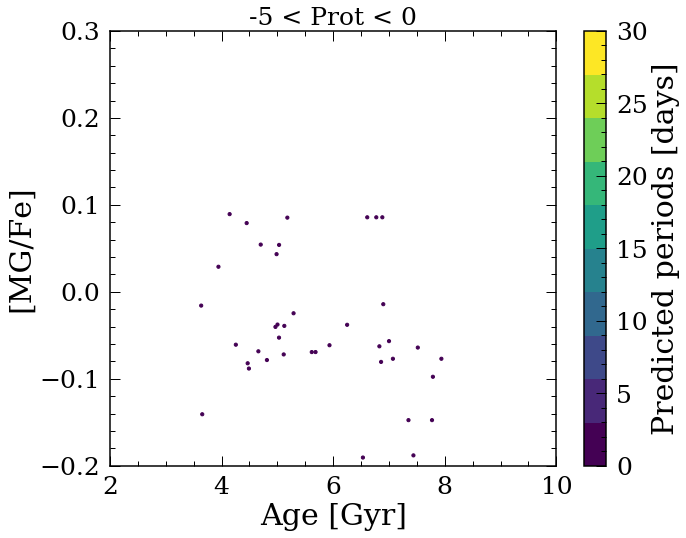

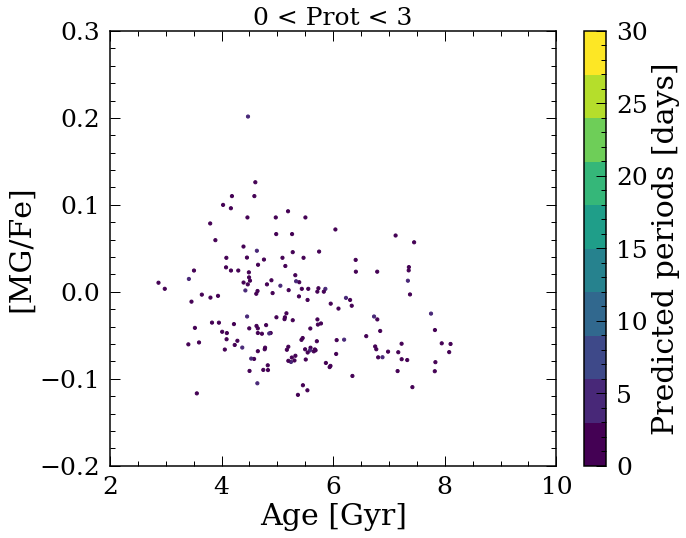

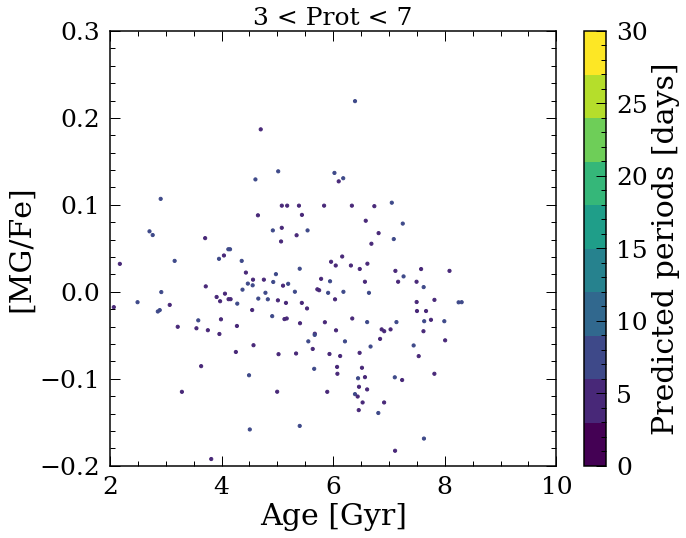

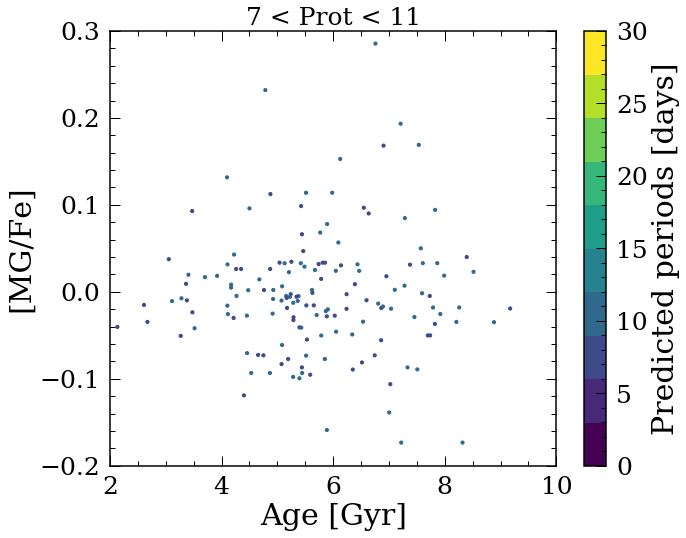

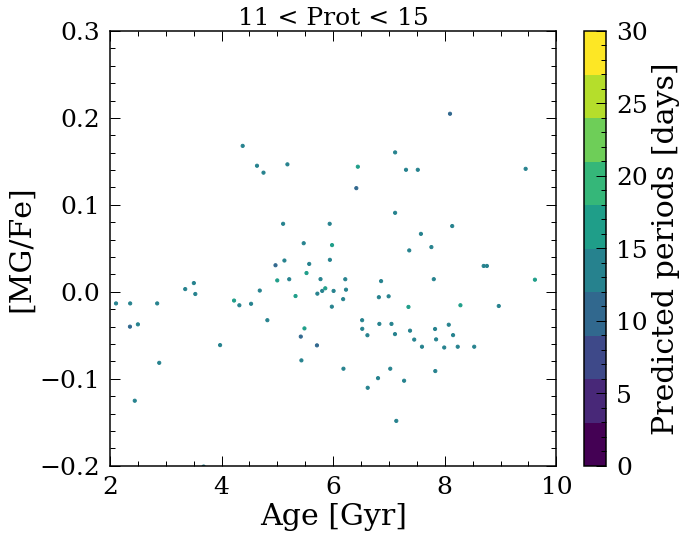

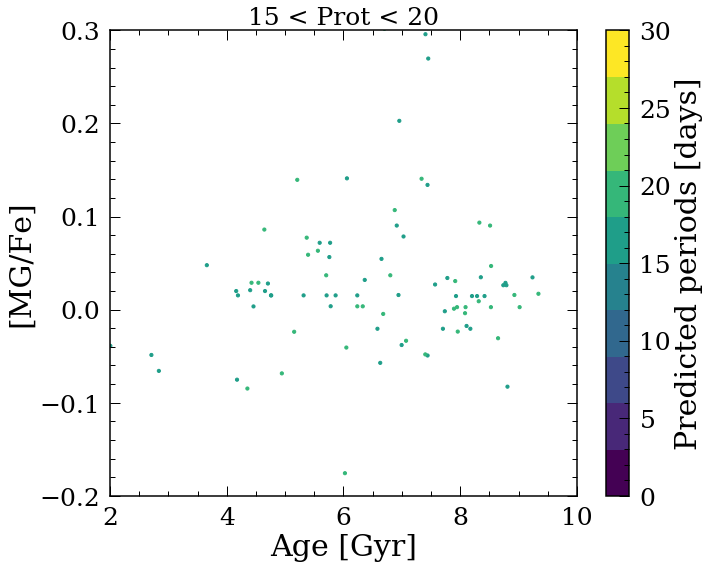

In [128]:
protselect=np.linspace(-5,20,7)
solarstars=solarstars.loc[solarstars['MG_FE']>-1000]
plotdiag('MG',protselect)


In [115]:
protselect=np.linspace(-5,20,7)
meanprot,disps,starpick=calcdisp_prot('MG',protselect)


100%|██████████| 6/6 [00:00<00:00,  7.30it/s]


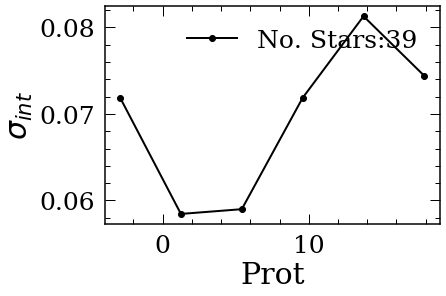

In [122]:
plt.figure()
plt.plot(meanprot,disps,'k-o',label='No. Stars:'+str(int(starpick)))
plt.xlabel('Prot')
plt.ylabel('$σ_{int}$')
plt.legend()